## Decision Tree Regressor Air Quality Index Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
df=df.dropna()

In [5]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [6]:
## check null values
X.isnull()

,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1088,False,False,False,False,False,False,False,False
1089,False,False,False,False,False,False,False,False
1090,False,False,False,False,False,False,False,False
1091,False,False,False,False,False,False,False,False


In [7]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

In [8]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

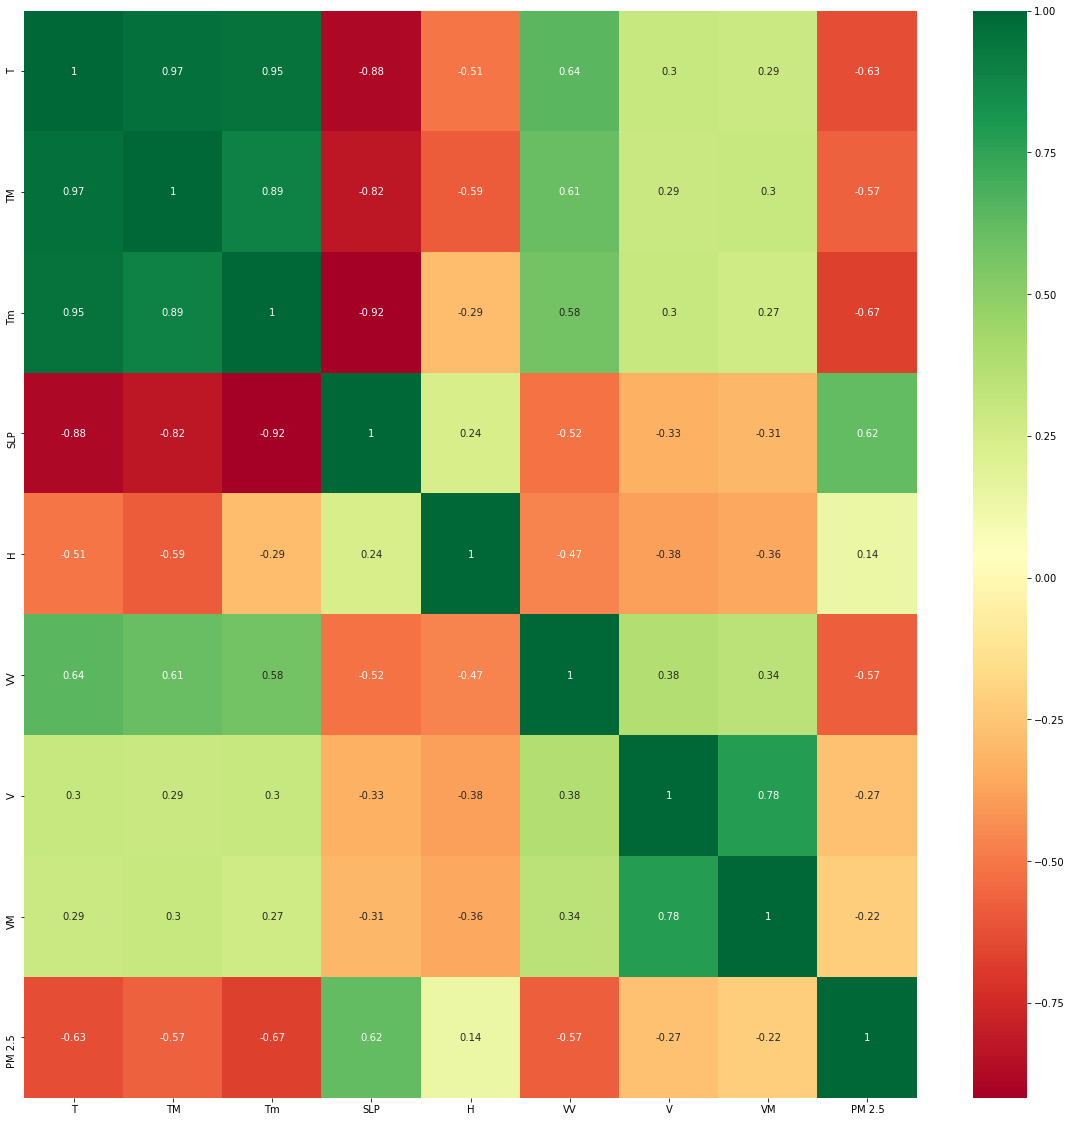

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [13]:
print(model.feature_importances_)

[0.19278562 0.09165384 0.2027817  0.14643981 0.08919622 0.18294005
 0.05344569 0.04075708]


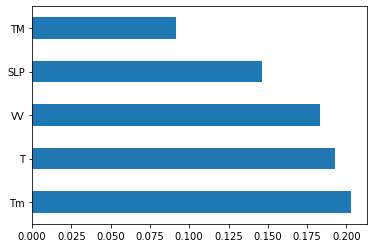

In [14]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Decision Tree Regressor

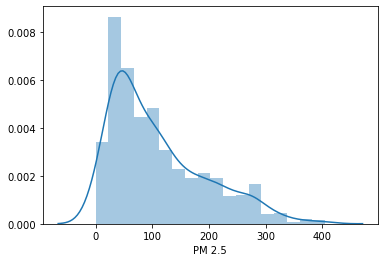

In [15]:
sns.distplot(y)

### Train Test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtree=DecisionTreeRegressor(criterion="mse")

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [21]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6473966779282654


In [22]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [23]:
score.mean()

0.5301811482674192

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [45]:
##conda install pydotplus
## conda install python-graphviz
'''
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

'''

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
'''features = list(df.columns[:-1])
features
'''

In [ ]:
'''
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

'''

In [ ]:
'''

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

'''

#### Model Evaluation

In [24]:
prediction=dtree.predict(X_test)

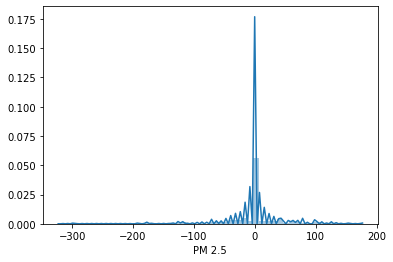

In [25]:
sns.distplot(y_test-prediction)

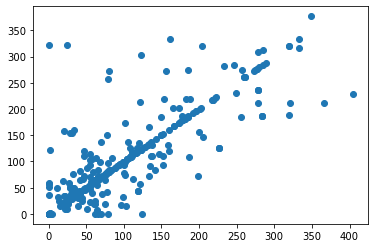

In [26]:
plt.scatter(y_test,prediction)

### Hyperparameter Tuning Decision Tree Regressor

In [27]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [28]:

## Hyper Parameter Optimization

params={
"splitter"    : ["best","random"] ,      
"max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
"min_samples_leaf" : [1,2,3,4,5],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
"max_features" : ["auto","log2","sqrt",None ],
"max_leaf_nodes":[None,10,20,30,40,50,60,70]n
    
}

splitter:  The strategy used to choose the split at each node

max_depth: The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_leaf:the minimum number of samples required to split an internal node

min_weight_fraction_leaf:The minimum number of samples required to be at a leaf node

max_features:the number of features to consider when looking for the best split


In [46]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [47]:
grid_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [48]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [49]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 6672 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 11280 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 16912 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 23568 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 31248 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 39952 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 49680 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 60432 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 72208 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 85008 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 98832 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 102400


 Time taken: 0 hours 3 minutes and 23.61 seconds.


In [50]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': 60,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [51]:
grid_search.best_score_

-3131.6489619178874

In [52]:
predictions=grid_search.predict(X_test)

In [53]:
predictions

array([ 80.4079072 , 178.35218927, 178.35218927,  80.4079072 ,
        53.96519309, 178.35218927, 222.39620166, 178.35218927,
        40.02112676, 178.35218927, 122.80069444,  96.37847222,
        40.02112676,  80.4079072 ,  96.37847222,  96.37847222,
       222.39620166, 222.39620166,  40.02112676, 178.35218927,
        40.02112676,  40.02112676,  53.96519309,  80.4079072 ,
       178.35218927,  80.4079072 ,  40.02112676,  80.4079072 ,
        40.02112676,  96.37847222,  80.4079072 , 178.35218927,
       122.80069444,  80.4079072 ,  40.02112676,  80.4079072 ,
       222.39620166,  96.37847222,  96.37847222, 178.35218927,
        53.96519309,  40.02112676, 122.80069444,  80.4079072 ,
       122.80069444,  96.37847222,  53.96519309, 122.80069444,
        80.4079072 ,  80.4079072 , 222.39620166,  80.4079072 ,
       222.39620166,  80.4079072 ,  40.02112676,  40.02112676,
       178.35218927, 122.80069444,  53.96519309,  40.02112676,
        53.96519309, 122.80069444,  40.02112676, 222.39

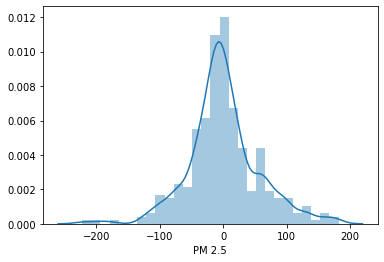

In [54]:
sns.distplot(y_test-predictions)

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.14163092473942
MSE: 3171.808145980198
RMSE: 56.31880810155874


# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [56]:
from sklearn import metrics

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 24.793279979674804
MSE: 2525.980168582741
RMSE: 50.25913020121559


In [58]:
import pickle 

In [59]:
# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(grid_search, file)